階層的クラスタリングは何度も取り扱いましたが、今回は、シルエット係数を用いて、ちょうどよさそうな大きさのクラスターの分割してその中身を見ることを考えてみたいと思います。

# 都道府県別お酒の消費量データを使います

データの詳細は <a href="https://qiita.com/maskot1977/items/453eddf5aa154c04668c">実習用データ</a> を参照のこと。「都道府県別アルコール類の消費量」をダウンロードして用います。

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 

# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/sake_dataJ.txt'

# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'sake_dataJ.txt') 

('sake_dataJ.txt', <http.client.HTTPMessage at 0x1058a3048>)

# pandas を用いたデータの読み込みと正規化

In [2]:
import pandas as pd
df = pd.read_csv('sake_dataJ.txt', sep='\t', index_col=0) # データの読み込み

今回は、axis=1 と指定することで「行ごとの正規化」を行ないます。

* axis=0 として「列ごとの正規化」をすると、どんなクラスタリング結果になるか
* 正規化を行わないと、どんなクラスタリング結果になるか

ぜひ、後で試してみてください。

In [4]:
# 行列の正規化
dfs = df.apply(lambda x: (x-x.mean())/x.std(), axis=1).fillna(0)

# 階層的クラスタリング

階層的クラスタリングについては <a href="https://www.slideshare.net/maskot3/ss-121402523">階層的クラスタリング入門の入門</a> などを参照のこと。

クラスタリングには色んな metric と method があるので、その中からそれぞれ一つずつを選択します。
* Metric （「距離」の定義）
  * braycurtis
  * canberra
  * chebyshev
  * cityblock
  * correlation
  * cosine
  * euclidean
  * hamming
  * jaccard
* Method （結合方法）
  * single
  * average
  * complete
  * weighted

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

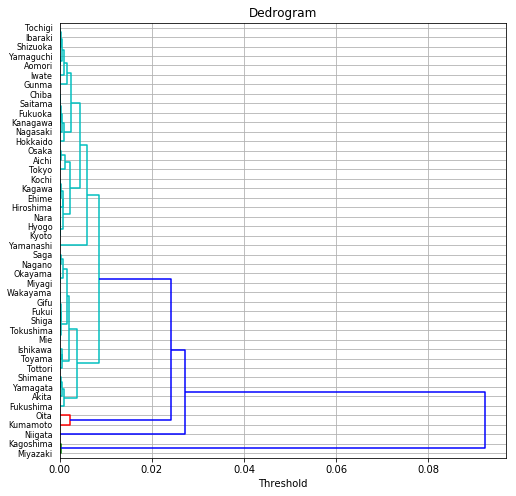

In [20]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
#y_labels.append("1")
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs.iloc[:, :], 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')
plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(df.index), color_threshold=0.01)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

# 階層的クラスタリングの結果ファイル

上記のコードで、階層クラスタリングの結果を result1 という変数に格納しました。これがどういうデータか見てみましょう。

In [6]:
pd.DataFrame(result1)

,0,1,2,3
0,27.0,28.0,0.000026,2.0
1,36.0,38.0,0.000028,2.0
2,10.0,11.0,0.000037,2.0
3,23.0,35.0,0.000038,2.0
4,7.0,8.0,0.000051,2.0
5,20.0,29.0,0.000061,2.0
6,25.0,46.0,0.000066,3.0
7,39.0,48.0,0.000073,3.0
8,17.0,51.0,0.000094,3.0
9,1.0,34.0,0.000131,2.0


まず、今回のデータは、沖縄県を除く４６都道府県からなので、０番目から４５番目までのノードから成ります。これらのノードは、メンバー数 1 のクラスタと見なすことができます。

上の表の０行目は、２７番目のノードと２８番目のノード（ノード間距離＝0.000026）を結合して４６番目のノードにしたことを意味します。この新しいノードが最初のクラスタで、クラスタのメンバ数は 2 となります。

同様に１行目は、３６番目のノードと３８番目のノード（ノード間距離＝0.000028）を結合して４７番目のノードにしたことを意味します。この新しいクラスタのメンバ数は 2 となります。

同様にどんどん続けると、６行目で、２５番目のノードと４６番目のノードを結合します。この４６番目のノードは、０行目の結合で誕生したノード（クラスタ）です。この新しいクラスタのメンバ数は 3 となります。

... というような、何と何をどういう順番で結合したかという情報が result1 に記述されています。

# 閾値とクラスタ数・平均クラスタサイズの関係

上記のように、距離の短いものから順にどんどん結合していくと、クラスタ数は１つずつ増え、クラスタあたりのメンバ数（クラスタサイズ）は大きくなります。その様子を計算して図示してみましょう。

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Threshold を変えるとクラスタ数や平均クラスタサイズがどう変わるか調べる
def draw_threshold_dependency(result):
    n_clusters = len(result)
    n_samples = len(result)
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(len(result) - 1):
        n1 = int(result[i][0])
        n2 = int(result[i][1])
        val = result[i][2]
        n_clusters -= 1
        x1.append(val)
        x2.append(val)
        y1.append(n_clusters)
        y2.append(float(n_samples) / float(n_clusters))

    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, 'yo-')
    plt.title('Threshold dependency of hierarchical clustering')
    plt.ylabel('Num of clusters')
    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, 'ro-')
    plt.xlabel('Threshold')
    plt.ylabel('Ave cluster size')
    plt.show()

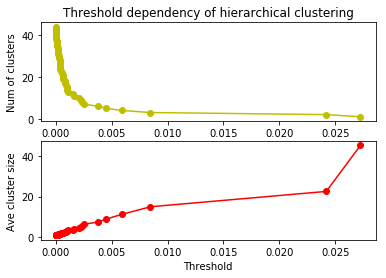

In [8]:
draw_threshold_dependency(result1)

# 指定した閾値でクラスタを得る

次のような関数で、指定した閾値でクラスタを得ることができます。

In [9]:
# 指定した thoreshold でクラスタを得る関数を作る
def get_cluster_by_threshold(result, threshold):
    output_clusters = []
    output_cluster_ids = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(len(result) - 1):
        n1 = int(result[i][0])
        n2 = int(result[i][1])
        val = result[i][2]
        n_clusters -= 1
        if val < threshold:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            #print [n2, m]
            n2 = m

        if m not in cluster_dict:
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

In [24]:
# 指定した thoreshold でクラスタを得る関数を使う。
clusterIDs = get_cluster_by_threshold(result1, 0.005)
print(clusterIDs)

[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 4, 4, 5, 5]


上記の clusterIDs には、クラスターID（それが何番目のクラスターに所属するか）が格納されます。今回は、0 - 5 の６つのクラスターに分かれました。ところがこの関数には弱点があります。metric などの変数を変えてクラスタリングすると、その「距離」の定義が変わるので、そのたびに閾値がどのくらいかいちいち確認しながら調整しなければいけないのです。

# 指定したクラスタ数でクラスタを得る

そこで、以下のように、閾値ではなく「いくつのクラスタに分割したいか」で決めることにしてみましょう。

In [25]:
# 指定したクラスタ数でクラスタを得る関数を作る。
def get_cluster_by_number(result, number):
    output_clusters = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(len(result) - 1):
        n1 = int(result[i][0])
        n2 = int(result[i][1])
        val = result[i][2]
        n_clusters -= 1
        if n_clusters >= number:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            #print [n2, m]
            n2 = m

        if m not in cluster_dict:
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

次のようにして「８個のクラスタに分けたい」というふうに指定できます。

In [40]:
clusterIDs = get_cluster_by_number(result1, 10)
print(clusterIDs)

[0, 1, 1, 2, 3, 3, 3, 1, 1, 1, 0, 0, 4, 0, 5, 2, 2, 2, 6, 2, 2, 1, 4, 2, 2, 7, 4, 7, 7, 2, 2, 3, 2, 7, 1, 2, 7, 7, 7, 0, 2, 0, 8, 8, 9, 9]


得られたクラスタのメンバ数の分布は次のようになります。

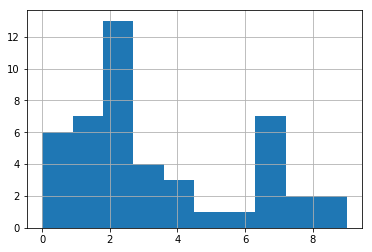

In [41]:
plt.hist(clusterIDs)
plt.grid()

# シルエット係数

シルエット係数は、a を「同じクラスタに属するメンバ間の距離の平均」、b を「異なるクラスタに属するメンバ間の距離の平均」としたときに、

* (b - a) / max(b, a)

で表されます。シルエット係数が高いほど、よく分割できている（クラスタ間距離に比べ、クラスタ内距離が十分に短い）ことを示します。

In [13]:
import math
def silhouette_coefficient(clusters, df):
    a_same = []
    b_diff = []
    for i, j in enumerate(clusters):
        vec1 = df.iloc[i, :].values
        for k, l in enumerate(clusters):
            if i < k:
                vec2 = df.iloc[k, :].values
                dist = 0.
                for v1, v2 in zip(vec1, vec2):
                    dist += (v1 - v2) ** 2
                dist = math.sqrt(dist)
                if j == l: # same cluster
                    a_same.append(dist)
                else: # different cluster
                    b_diff.append(dist)
    a = sum(a_same) / len(a_same)
    b = sum(b_diff) / len(b_diff)
    return (b - a) / max(b, a)

In [42]:
silhouette_coefficient(clusterIDs, df)

0.6192139990573414

# シルエット係数のクラスタ数依存性

次のようにして、クラスタ数を変えた時にシルエット係数がどう変わるかを可視化できます。

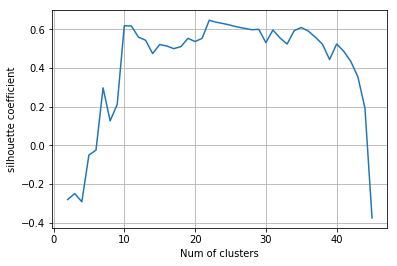

In [16]:
x = []
y = []
for i in range(2, len(df)):
    x.append(i)
    y.append(silhouette_coefficient(get_cluster_by_number(result1, i), df))
plt.plot(x, y)
plt.xlabel("Num of clusters")
plt.ylabel("silhouette coefficient")
plt.grid()
plt.show()

# クラスタに分割して中身を見る

上記の計算より、クラスタ数が１０個の時にシルエット数が極大になることが分かりました。そこで、クラスタ数を１０個として、どのようなクラスターが得られたか確認してみましょう。

In [44]:
clusterIDs = get_cluster_by_number(result1, 10)

次のようにして、１０個のクラスターのメンバーとそのアルコール消費量が確認できます。どのように分かれたか、得られたグラフをよくみて考察してみましょう。

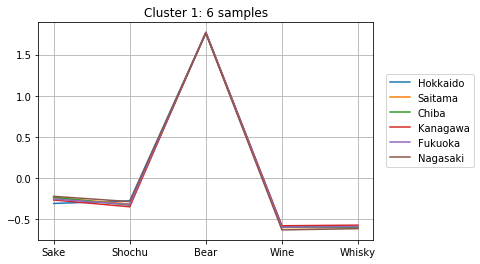

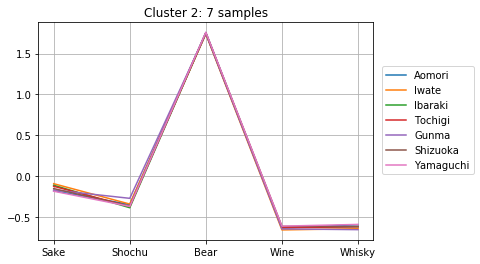

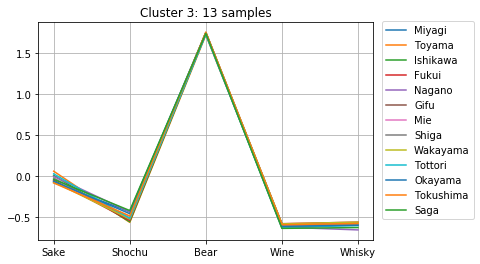

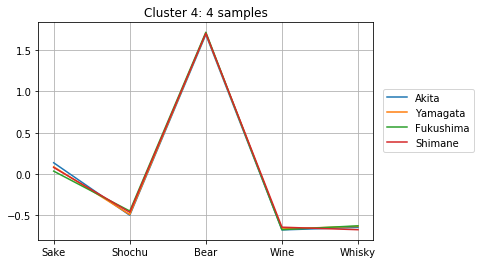

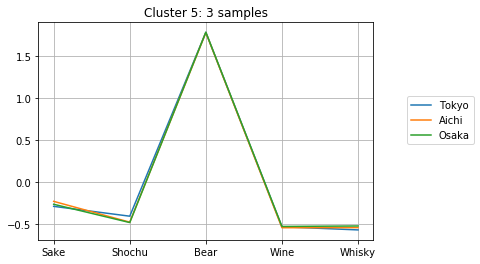

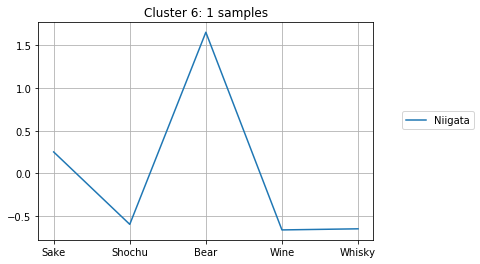

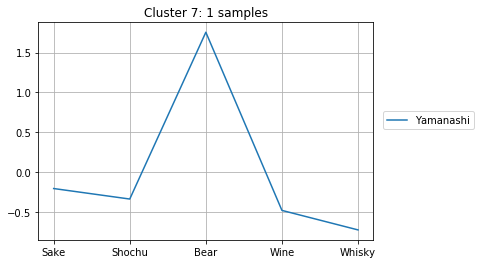

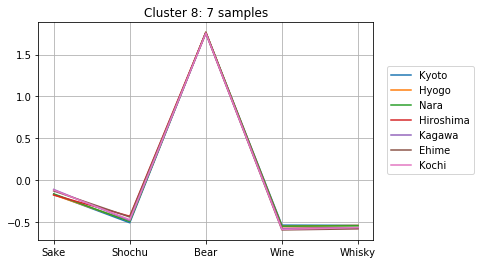

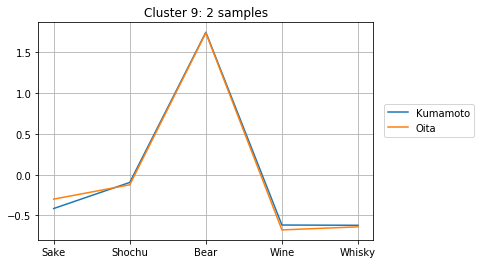

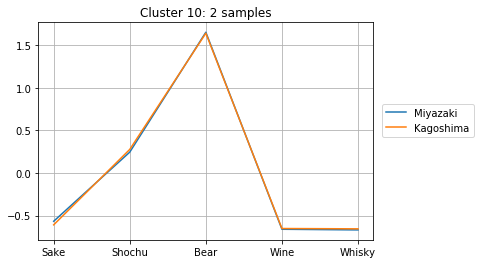

In [18]:
for i in range(max(clusters) + 1):
    cluster = []
    for j, k in enumerate(clusters):
        if i == k:
            cluster.append(j)
    plt.title("Cluster {}: {} samples".format(i + 1, len(cluster)))
    for j in cluster:
        plt.plot(dfs.iloc[j, :], label=dfs.index[j])
    plt.legend( loc = 'center right',
          bbox_to_anchor = (0.8, 0.5, 0.5, 0.1),
          borderaxespad = 0.0)
    plt.grid()
    plt.show()

「行ごとの正規化」を「列ごとの正規化」「正規化しない」などに変更した場合どのように結果が変わるか確認し、「正規化」の効果を考察しましょう。

また、階層クラスタリングの metric や method を変えた時にどのように結果が変わるか確認しましょう。